# Camera Calibration with OpenCV

Some good background for calibration is found in the OpenCV [documentation](http://docs.opencv.org/3.1.0/d4/d94/tutorial_camera_calibration.html).

In [2]:
%matplotlib inline

In [3]:
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [4]:
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)  # width height

Let's print what version of `OpenCV` we have and grab some tools from `pygecko` to make things easier.

In [5]:
print('OpenCV version {}'.format(cv2.__version__))
from opencvutils.CameraCalibrate import CameraCalibration
import glob

OpenCV version 3.4.0
<<< WARNING: using fake raspberry pi interfaces >>>
<<< Using: <class 'fake_rpi.RPi._GPIO'> >>>


## Calibrate Camera

Now grab a bunch of calibration images from a folder:

In [6]:
def printImages(imgs, size=(5,4)):
    print('Displaying {} images'.format(len(imgs)))
    for i, im in enumerate(imgs):
        plt.subplot(size[0], size[1], i+1)
        if len(im.shape) > 2:
            cim = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            plt.imshow(cim)
        else:
            plt.imshow(im, cmap="gray")

In [7]:
calibration_images = '{0!s}/IMG_*.JPG'.format(('cal_pics'))
fnames = glob.glob(calibration_images)

In [8]:
images = []
for i, fname in enumerate(fnames):
    im = cv2.imread(fname)
    im = cv2.resize(im, (1920, 1080)) # width, height
    images.append(im)

In [9]:
# plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
# print(len(images[0].shape))

In [10]:
# pylab.rcParams['figure.figsize'] = (8.0, 8.0)
# print(images[0].shape)
# printImages(images, (5,4))

Create a calibration object and set it up to find a 9x6 checkerboard:

In [11]:
cal = CameraCalibration()
cal.marker_checkerboard = True
cal_mat = cal.calibrate(images, marker_size=(10, 7))

[0] + found 70 of 70 corners
[1] + found 70 of 70 corners
[2] + found 70 of 70 corners
[3] + found 70 of 70 corners
[4] + found 70 of 70 corners
[5] + found 70 of 70 corners
[6] + found 70 of 70 corners
[7] + found 70 of 70 corners
[8] + found 70 of 70 corners
[9] + found 70 of 70 corners
[10] + found 70 of 70 corners
[11] + found 70 of 70 corners
[12] + found 70 of 70 corners
[13] + found 70 of 70 corners
[14] + found 70 of 70 corners
[15] + found 70 of 70 corners
[16] + found 70 of 70 corners
[17] + found 70 of 70 corners
[18] + found 70 of 70 corners


In [12]:
# # pylab.rcParams['figure.figsize'] = (8.0, 18.0)
# cimg = []
# cimgs = cal.save_cal_imgs
# printImages(cimgs, (10,2))
# plt.imshow(cv2.cvtColor(cimgs[0], cv2.COLOR_BGR2RGB));

The resulting camera info shows a low level of distortion, so the effect with and without the correction will be small to the human eye. However, for computer vision, it will make a small difference.

In [13]:
cal.printMatrix()
# import pprint as pp
# pp.pprint(cal.data)

focal length 3030.6 2235.6
image center 1132.1 587.2
radial distortion 1.975 -29.496
tangental distortion 0.004 0.043
RMS error: 4.85622548941


## Undistort Image

Now let's read back in an image and use the calibration matrix to undistort it.

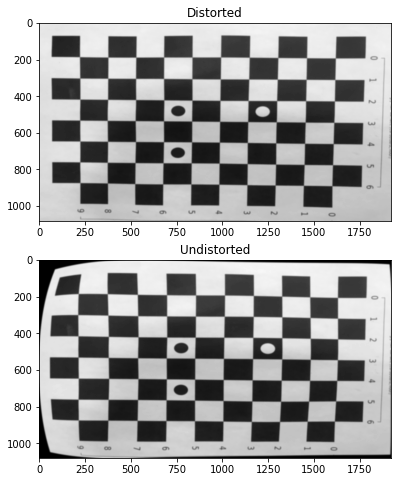

In [14]:
image = cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY)
dst = cal.undistort(image, 1)

plt.subplot(2,1,1)
plt.imshow(image, cmap='gray', interpolation = 'bicubic');
plt.title('Distorted')

plt.subplot(2,1,2)
plt.imshow(dst, cmap='gray', interpolation = 'bicubic');
plt.title('Undistorted');

## Save

We can save the calibration matrix for later:

In [ ]:
cal.save_file = 'cal.npy'
cal.save()

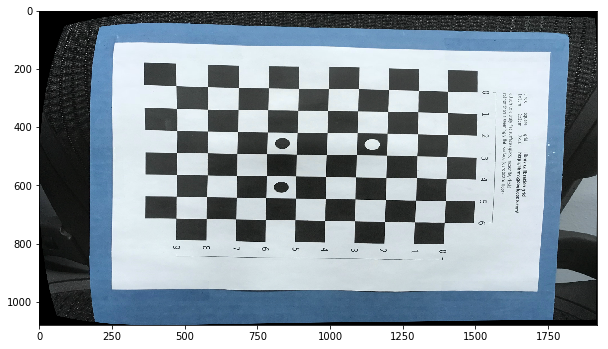

In [16]:
image = images[0]
h,  w = image.shape[:2]
alpha = 1.0
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(
    cal_mat['camera_matrix'],
    cal_mat['dist_coeff'],
    (w,h),
    alpha)

dst = cv2.undistort(
    image, 
    cal_mat['camera_matrix'], 
    cal_mat['dist_coeff'], 
    None, 
    newcameramtx)
plt.imshow(dst)

In [ ]:
plt.imshow(image)

In [ ]:
help(cv2.getOptimalNewCameraMatrix)

In [ ]:
help(cv2.calibrateCamera)

In [ ]:
print(image.shape)
print(image.shape[::-1])

In [1]:
(1,2)[::-1]

(2, 1)